<p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold"><br>
Week1 - Analytics Edge - Assignment Jun-2017</p><br>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## Part 1 - An Analytical Detective##

In [2]:
df = pd.read_csv('../mvtWeek1.csv')

/home/guest/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.shape

(191641, 11)

In [4]:
df.head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Latitude,Longitude
0,8951354,12/31/12 23:15,STREET,False,False,623,6,69,2012,41.756284,-87.621645
1,8951141,12/31/12 22:00,STREET,False,False,1213,12,24,2012,41.898788,-87.661303
2,8952745,12/31/12 22:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,41.969186,-87.767670
3,8952223,12/31/12 22:00,STREET,False,False,724,7,67,2012,41.769329,-87.657726
4,8951608,12/31/12 21:30,STREET,False,False,211,2,35,2012,41.837568,-87.621761


In [5]:
df['ID'].max()

9181151

In [6]:
df['Beat'].min()

111

In [7]:
df['Arrest'].value_counts()

False    176105
True      15536
Name: Arrest, dtype: int64

In [8]:
df['LocationDescription'].value_counts().head()

STREET                            156564
PARKING LOT/GARAGE(NON.RESID.)     14852
OTHER                               4573
ALLEY                               2308
GAS STATION                         2111
Name: LocationDescription, dtype: int64

In [9]:
df.dtypes

ID                       int64
Date                    object
LocationDescription     object
Arrest                    bool
Domestic                  bool
Beat                     int64
District                object
CommunityArea           object
Year                     int64
Latitude               float64
Longitude              float64
dtype: object

In [10]:
DateConvert=pd.to_datetime(df['Date'], format='%m/%d/%y %H:%M')

In [11]:
DateConvert.dtype

dtype('<M8[ns]')

In [12]:
DateConvert.describe()

count                  191641
unique                 131680
top       2008-05-16 00:00:00
freq                       11
first     2001-01-01 00:01:00
last      2012-12-31 23:15:00
Name: Date, dtype: object

In [13]:
#Median
DateConvert[len(DateConvert)/2]

Timestamp('2006-05-21 12:30:00')

In [14]:
#pd.DatetimeIndex(DateConvert).month
#df['Month']=pd.DatetimeIndex(DateConvert).month
df['Month']=DateConvert.dt.month

In [15]:
#0-Monday, 1- Tuesday
#df['Weekday']=DateConvert.dt.weekday
#df['Weekday']=DateConvert.dt.dayofweek
df['Weekday']=DateConvert.dt.weekday_name

In [16]:
df['Date']=DateConvert

In [17]:
df

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Latitude,Longitude,Month,Weekday
0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,41.756284,-87.621645,12,Monday
1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,41.898788,-87.661303,12,Monday
2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,41.969186,-87.767670,12,Monday
3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,41.769329,-87.657726,12,Monday
4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,41.837568,-87.621761,12,Monday
5,8950793,2012-12-31 20:30:00,STREET,True,False,2521,25,19,2012,41.928561,-87.753998,12,Monday
6,8950760,2012-12-31 20:10:00,STREET,False,False,423,4,48,2012,41.732064,-87.564807,12,Monday
7,8951611,2012-12-31 20:00:00,STREET,False,False,231,2,40,2012,41.792511,-87.619315,12,Monday
8,8951802,2012-12-31 19:00:00,STREET,True,False,1021,10,29,2012,41.863619,-87.709099,12,Monday
9,8950706,2012-12-31 18:00:00,STREET,False,False,1215,12,24,2012,41.890080,-87.658816,12,Monday


In [18]:
df['Month'].value_counts()

10    17086
7     16801
8     16572
12    16426
11    16063
9     16060
1     16047
5     16035
6     16002
3     15758
4     15280
2     13511
Name: Month, dtype: int64

In [19]:
df['Weekday'].value_counts()

Friday       29284
Wednesday    27416
Monday       27397
Thursday     27319
Saturday     27118
Tuesday      26791
Sunday       26316
Name: Weekday, dtype: int64

In [20]:
df[df['Arrest']==True]['Month'].value_counts()

1     1435
12    1397
10    1342
8     1329
7     1324
3     1298
11    1256
4     1252
9     1248
2     1238
6     1230
5     1187
Name: Month, dtype: int64

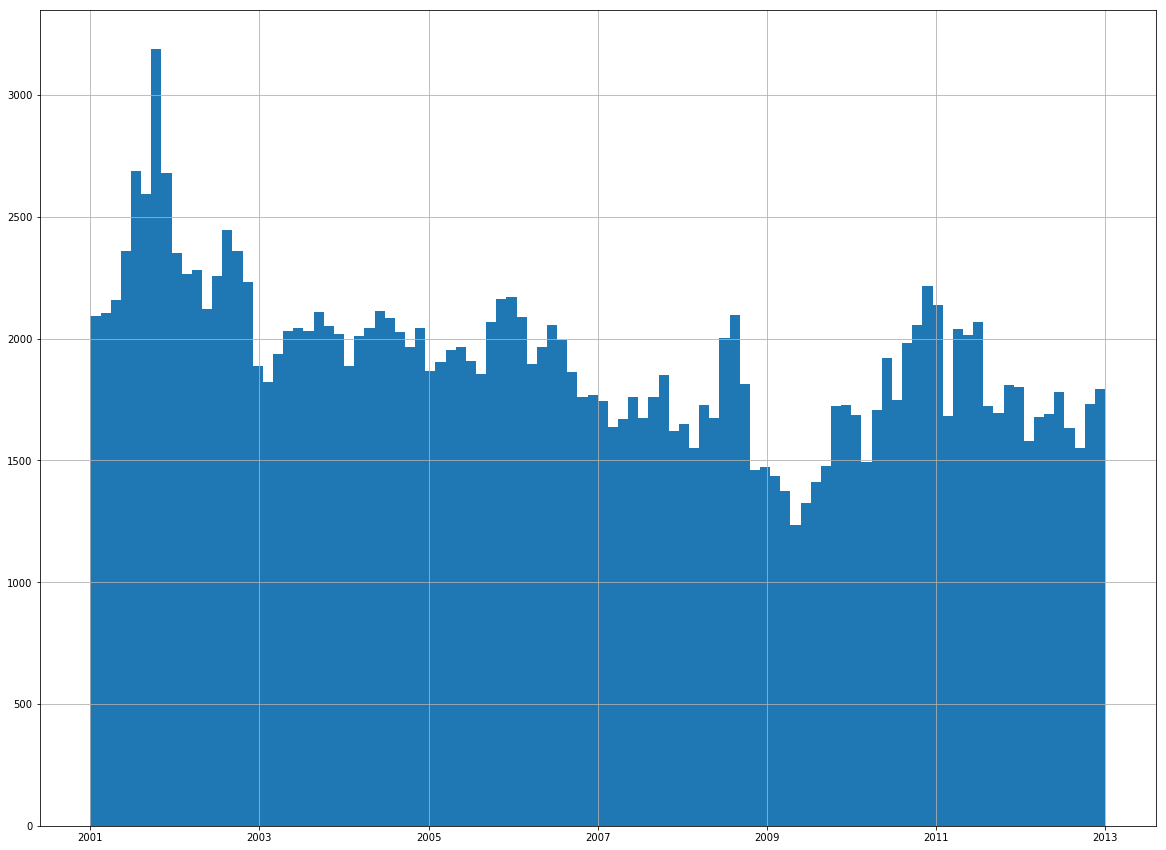

In [21]:
from datetime import datetime
#np.datetime64('2002-06-28 10:01').astype(datetime)
#df['Date'].astype(datetime)
#df.hist(column='Date', figsize=(15,20))
df['Date'].hist(bins=100, figsize=(20, 15))

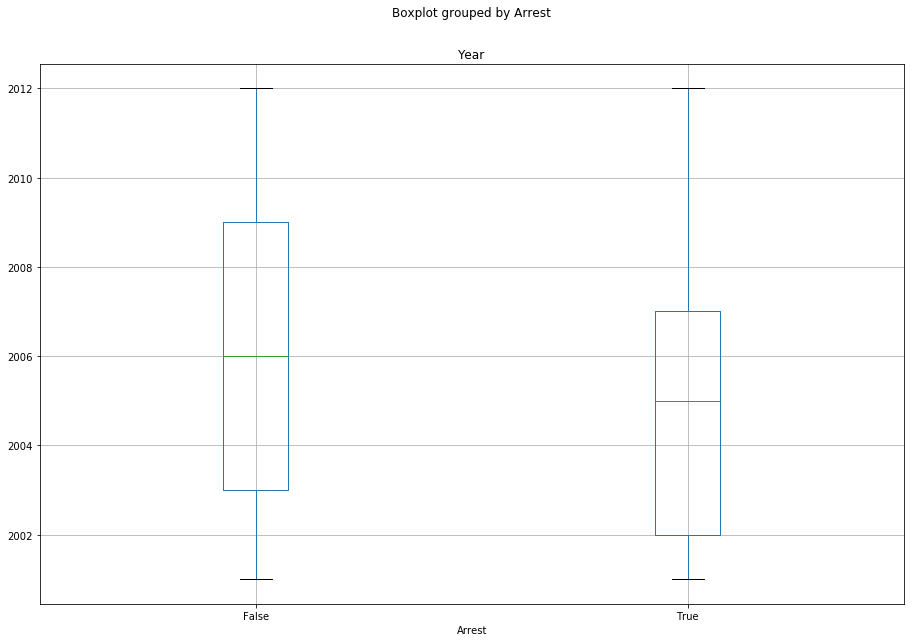

In [30]:
#df1 = pd.read_csv('../mvtWeek1.csv')
df.boxplot(column='Year', by='Arrest', figsize=(15,10))

In [33]:
df[df['Year']==2001]['Arrest'].value_counts()

False    18517
True      2152
Name: Arrest, dtype: int64

In [35]:
2152.0/(2152+18517)

0.10411727708161982

In [36]:
df[df['Year']==2007]['Arrest'].value_counts()

False    13068
True      1212
Name: Arrest, dtype: int64

In [37]:
1212.0/(1212+13068)

0.08487394957983194

In [38]:
df[df['Year']==2012]['Arrest'].value_counts()

False    13542
True       550
Name: Arrest, dtype: int64

In [40]:
550.0/(550+13542)

0.03902923644621062

In [41]:
df['LocationDescription'].value_counts()

STREET                                             156564
PARKING LOT/GARAGE(NON.RESID.)                      14852
OTHER                                                4573
ALLEY                                                2308
GAS STATION                                          2111
DRIVEWAY - RESIDENTIAL                               1675
RESIDENTIAL YARD (FRONT/BACK)                        1536
RESIDENCE                                            1302
RESIDENCE-GARAGE                                     1176
VACANT LOT/LAND                                       985
VEHICLE NON-COMMERCIAL                                817
SIDEWALK                                              462
CHA PARKING LOT/GROUNDS                               405
AIRPORT/AIRCRAFT                                      363
POLICE FACILITY/VEH PARKING LOT                       266
PARK PROPERTY                                         255
SCHOOL, PUBLIC, GROUNDS                               206
APARTMENT     

In [53]:
top5=df[(df['LocationDescription']=='STREET') | (df['LocationDescription']=='PARKING LOT/GARAGE(NON.RESID.)') | (df['LocationDescription']=='ALLEY') | (df['LocationDescription']=='GAS STATION')  | (df['LocationDescription']=='DRIVEWAY - RESIDENTIAL')]

In [54]:
top5.shape

(177510, 13)

In [55]:
top5['LocationDescription'].value_counts()

STREET                            156564
PARKING LOT/GARAGE(NON.RESID.)     14852
ALLEY                               2308
GAS STATION                         2111
DRIVEWAY - RESIDENTIAL              1675
Name: LocationDescription, dtype: int64

In [56]:
top5.shape

(177510, 13)

In [57]:
top5['Arrest'].value_counts()

False    163492
True      14018
Name: Arrest, dtype: int64

In [80]:
ct=pd.crosstab(top5['LocationDescription'], top5['Arrest'], margins=True)

In [81]:
ct

Arrest,False,True,All
LocationDescription,,,
ALLEY,2059,249,2308
DRIVEWAY - RESIDENTIAL,1543,132,1675
GAS STATION,1672,439,2111
PARKING LOT/GARAGE(NON.RESID.),13249,1603,14852
STREET,144969,11595,156564
All,163492,14018,177510


In [72]:
249.0/2308

0.10788561525129983

In [73]:
132.0/1675

0.07880597014925374

In [74]:
439.0/2111

0.2079583135954524

In [75]:
1603.0/14852

0.1079315917048209

In [76]:
11595.0/156564

0.07405917069058021

In [78]:
top5.columns

Index([u'ID', u'Date', u'LocationDescription', u'Arrest', u'Domestic', u'Beat',
       u'District', u'CommunityArea', u'Year', u'Latitude', u'Longitude',
       u'Month', u'Weekday'],
      dtype='object')

In [82]:
pd.crosstab(top5['LocationDescription'], top5['Weekday'], margins=True)

Weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,All
LocationDescription,,,,,,,,
ALLEY,385,320,341,307,315,323,317,2308
DRIVEWAY - RESIDENTIAL,257,255,202,221,263,243,234,1675
GAS STATION,332,280,338,336,282,270,273,2111
PARKING LOT/GARAGE(NON.RESID.),2331,2128,2199,1936,2082,2073,2103,14852
STREET,23773,22305,22175,21756,22296,21888,22371,156564
All,27078,25288,25255,24556,25238,24797,25298,177510


## Part 2- Stock Dynamics ##

In [84]:
IBM = pd.read_csv('../IBMStock.csv')
GE = pd.read_csv('../GEStock.csv')
ProcterGamble = pd.read_csv('../ProcterGambleStock.csv')
CocaCola = pd.read_csv('../CocaColaStock.csv')
Boeing = pd.read_csv('../BoeingStock.csv')

In [85]:
IBM.head()

,Date,StockPrice
0,1/1/70,360.319048
1,2/1/70,346.723684
2,3/1/70,327.345714
3,4/1/70,319.852727
4,5/1/70,270.375238


In [86]:
IBM.dtypes

Date           object
StockPrice    float64
dtype: object

In [87]:
IBM.shape

(480, 2)

In [88]:
IBM.describe()

,StockPrice
count,480.000000
mean,144.375030
std,87.822078
min,43.395000
25%,88.343929
50%,112.114595
75%,165.407284
max,438.901579


In [89]:
IBM['Date'].min()

'1/1/00'

In [90]:
IBM['Date'].max()

'9/1/99'

In [113]:
IBM['Date']=pd.to_datetime(IBM['Date'], format='%m/%d/%y')
GE['Date']=pd.to_datetime(GE['Date'], format='%m/%d/%y')
ProcterGamble['Date']=pd.to_datetime(ProcterGamble['Date'], format='%m/%d/%y')
CocaCola['Date']=pd.to_datetime(CocaCola['Date'], format='%m/%d/%y')
Boeing['Date']=pd.to_datetime(Boeing['Date'], format='%m/%d/%y')

In [93]:
IBM['Date'].min()

Timestamp('1970-01-01 00:00:00')

In [94]:
IBM['Date'].max()

Timestamp('2009-12-01 00:00:00')

In [95]:
GE.describe()

,StockPrice
count,480.000000
mean,59.303504
std,23.992551
min,9.293636
25%,44.214405
50%,55.812045
75%,72.226201
max,156.843684


In [97]:
CocaCola.describe()

,StockPrice
count,480.000000
mean,60.029730
std,25.166291
min,30.057143
25%,42.755595
50%,51.436988
75%,69.617192
max,146.584286


In [98]:
Boeing.describe()

,StockPrice
count,480.000000
mean,46.592934
std,19.891837
min,12.736364
25%,34.642274
50%,44.883398
75%,57.214486
max,107.280000


In [99]:
ProcterGamble.describe()

,StockPrice
count,480.000000
mean,77.704516
std,18.194140
min,46.884545
25%,62.478663
50%,78.336077
75%,89.468375
max,149.620000


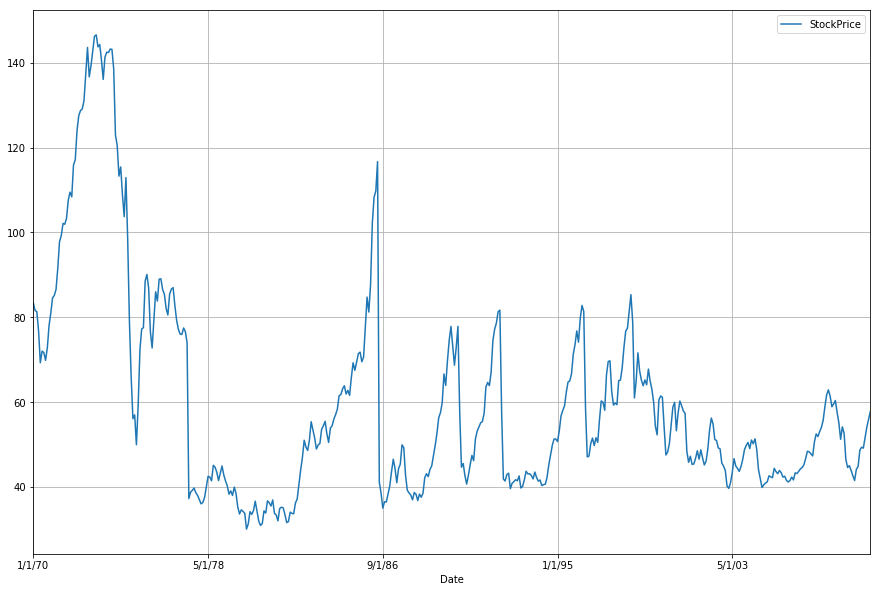

In [100]:
CocaCola.plot(x='Date', y='StockPrice', figsize=(15,10), grid=True)

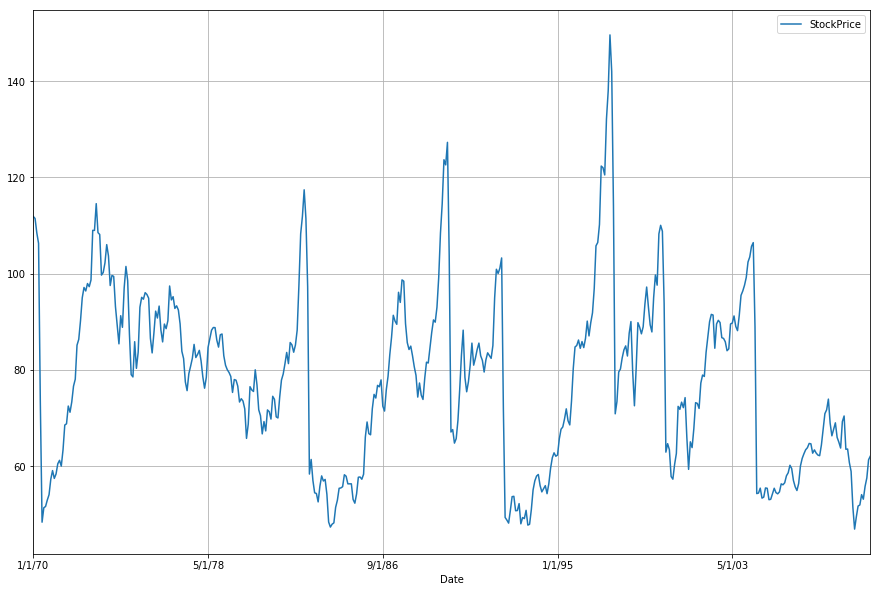

In [106]:
ProcterGamble.plot(x='Date', y='StockPrice', figsize=(15,10), grid=True)

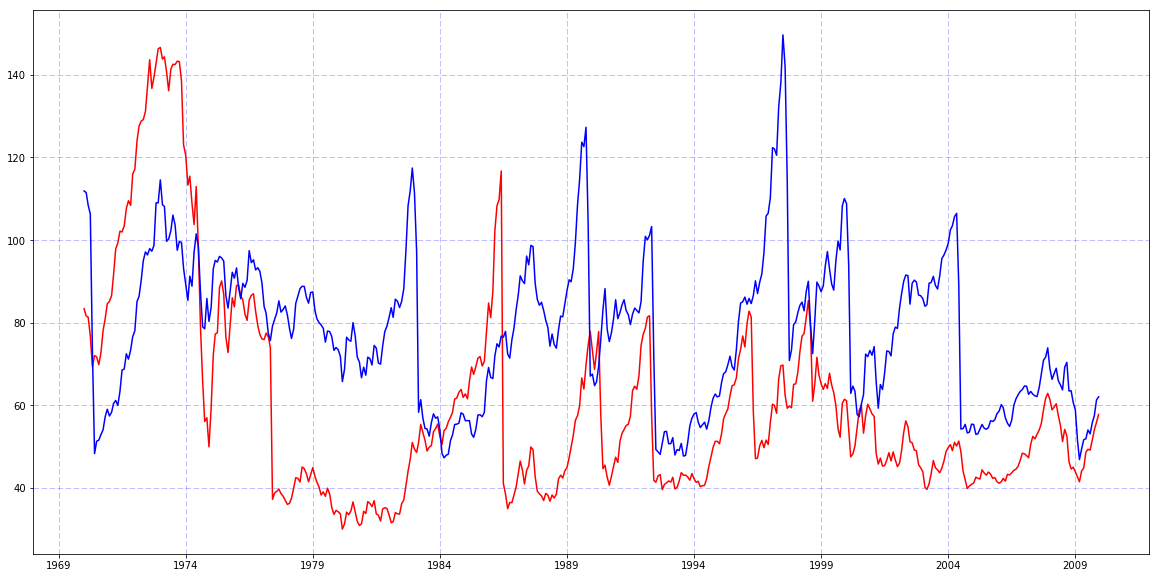

In [121]:
#plt.subplot(212)
plt.figure(figsize=(20,10))
plt.plot(CocaCola['Date'], CocaCola['StockPrice'], 'r', ProcterGamble['Date'], ProcterGamble['StockPrice'], 'b')
plt.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
plt.show()

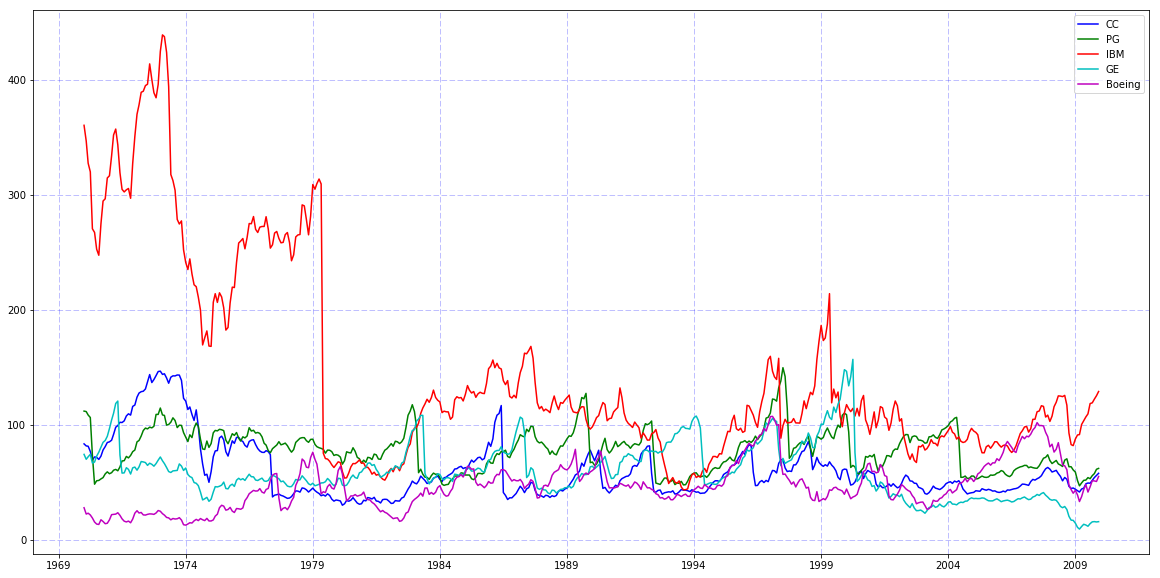

In [128]:
plt.figure(figsize=(20,10))
plt.plot(CocaCola['Date'], CocaCola['StockPrice'], 'b', ProcterGamble['Date'], ProcterGamble['StockPrice'], 'g', IBM['Date'], IBM['StockPrice'], 'r', GE['Date'], GE['StockPrice'], 'c', Boeing['Date'], Boeing['StockPrice'], 'm')
plt.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
plt.legend(['CC', 'PG', 'IBM', 'GE', 'Boeing'])
plt.show()

In [133]:
print IBM.describe()
IBM.groupby(IBM['Date'].dt.month, as_index=False).mean()

       StockPrice
count  480.000000
mean   144.375030
std     87.822078
min     43.395000
25%     88.343929
50%    112.114595
75%    165.407284
max    438.901579


,StockPrice
0,150.238423
1,152.693993
2,152.432690
3,152.116824
4,151.502194
5,139.090676
6,139.067018
7,140.145475
8,139.088527
9,137.346553


In [134]:
print GE.describe()
GE.groupby(GE['Date'].dt.month, as_index=False).mean()

       StockPrice
count  480.000000
mean    59.303504
std     23.992551
min      9.293636
25%     44.214405
50%     55.812045
75%     72.226201
max    156.843684


,StockPrice
0,62.045106
1,62.520805
2,63.150548
3,64.480092
4,60.871351
5,56.468439
6,56.733493
7,56.503149
8,56.239131
9,56.238968


In [135]:
print CocaCola.describe()
CocaCola.groupby(CocaCola['Date'].dt.month, as_index=False).mean()

       StockPrice
count  480.000000
mean    60.029730
std     25.166291
min     30.057143
25%     42.755595
50%     51.436988
75%     69.617192
max    146.584286


,StockPrice
0,60.368487
1,60.734754
2,62.071354
3,62.688882
4,61.443581
5,60.812084
6,58.983460
7,58.880139
8,57.600238
9,57.938868


## Part 3 - Demographics and Employment in the United States

In [212]:
cps=pd.read_csv("../CPSData.csv")

In [140]:
cps.shape

(131302, 14)

In [141]:
cps.dtypes

PeopleInHousehold       int64
Region                 object
State                  object
MetroAreaCode         float64
Age                     int64
Married                object
Sex                    object
Education              object
Race                   object
Hispanic                int64
CountryOfBirthCode      int64
Citizenship            object
EmploymentStatus       object
Industry               object
dtype: object

In [142]:
cps['Industry'].value_counts()

Educational and health services                15017
Trade                                           8933
Professional and business services              7519
Manufacturing                                   6791
Leisure and hospitality                         6364
Construction                                    4387
Financial                                       4347
Transportation and utilities                    3260
Other services                                  3224
Public administration                           3186
Information                                     1328
Agriculture, forestry, fishing, and hunting     1307
Mining                                           550
Armed forces                                      29
Name: Industry, dtype: int64

In [143]:
cps['State'].value_counts()

California              11570
Texas                    7077
New York                 5595
Florida                  5149
Pennsylvania             3930
Illinois                 3912
Ohio                     3678
Maryland                 3200
Minnesota                3139
Michigan                 3063
Virginia                 2953
Colorado                 2925
Connecticut              2836
Georgia                  2807
Wisconsin                2686
New Hampshire            2662
North Carolina           2619
New Jersey               2567
Iowa                     2528
Washington               2366
Maine                    2263
Delaware                 2214
Rhode Island             2209
Missouri                 2145
Hawaii                   2099
Indiana                  2004
South Dakota             2000
Massachusetts            1987
Nebraska                 1949
Oregon                   1943
Kansas                   1935
Vermont                  1890
Nevada                   1856
Utah      

In [144]:
cps['Citizenship'].value_counts()

Citizen, Native         116639
Non-Citizen               7590
Citizen, Naturalized      7073
Name: Citizenship, dtype: int64

In [146]:
(116639+7073.0)/(116639+7073+7590)

0.9421943306271039

In [147]:
pd.crosstab(cps['Race'], cps['Hispanic'], margins=True)

Hispanic,0,1,All
Race,,,
American Indian,1129,304,1433
Asian,6407,113,6520
Black,13292,621,13913
Multiracial,2449,448,2897
Pacific Islander,541,77,618
White,89190,16731,105921
All,113008,18294,131302


In [148]:
cps.isnull().any()

PeopleInHousehold     False
Region                False
State                 False
MetroAreaCode          True
Age                   False
Married                True
Sex                   False
Education              True
Race                  False
Hispanic              False
CountryOfBirthCode    False
Citizenship           False
EmploymentStatus       True
Industry               True
dtype: bool

In [155]:
pd.crosstab(cps['Region'], cps['Married'].isnull(), margins=True)

Married,False,True,All
Region,,,
Midwest,24609,6075,30684
Northeast,21432,4507,25939
South,33535,7967,41502
West,26388,6789,33177
All,105964,25338,131302


In [154]:
pd.crosstab(cps['Sex'], cps['Married'].isnull(), margins=True)

Married,False,True,All
Sex,,,
Female,55264,12217,67481
Male,50700,13121,63821
All,105964,25338,131302


In [153]:
pd.crosstab(cps['Age'], cps['Married'].isnull(), margins=True)

Married,False,True,All
Age,,,
0,0,1283,1283
1,0,1559,1559
2,0,1574,1574
3,0,1693,1693
4,0,1695,1695
5,0,1795,1795
6,0,1721,1721
7,0,1681,1681
8,0,1729,1729


In [156]:
pd.crosstab(cps['Citizenship'], cps['Married'].isnull(), margins=True)

Married,False,True,All
Citizenship,,,
"Citizen, Native",91956,24683,116639
"Citizen, Naturalized",6910,163,7073
Non-Citizen,7098,492,7590
All,105964,25338,131302


In [158]:
pd.crosstab(cps['State'], cps['MetroAreaCode'].isnull(), margins=True)

MetroAreaCode,False,True,All
State,,,
Alabama,1020,356,1376
Alaska,0,1590,1590
Arizona,1327,201,1528
Arkansas,724,697,1421
California,11333,237,11570
Colorado,2545,380,2925
Connecticut,2593,243,2836
Delaware,1696,518,2214
District of Columbia,1791,0,1791


In [160]:
r=pd.crosstab(cps['Region'], cps['MetroAreaCode'].isnull(), margins=True)

In [161]:
r

MetroAreaCode,False,True,All
Region,,,
Midwest,20010,10674,30684
Northeast,20330,5609,25939
South,31631,9871,41502
West,25093,8084,33177
All,97064,34238,131302


In [179]:
print 10674.0/30684
print 5609.0/26939
print 9871./41502
print 8084./33177

0.347868596011
0.208211143695
0.237843959327
0.243662778431


In [195]:
pd.pivot_table(cps,index=['Region'], values=['MetroAreaCode'], aggfunc=np.count_nonzero)

,MetroAreaCode
Region,
Midwest,30684.0
Northeast,25939.0
South,41502.0
West,33177.0


In [202]:
cps[['Region','MetroAreaCode']].groupby(['Region']).sum()

,MetroAreaCode
Region,
Midwest,5.516794e+08
Northeast,1.071042e+09
South,9.605627e+08
West,8.212075e+08


In [206]:
MetroAreaMap=pd.read_csv("../MetroAreaCodes.csv")
CountryMap=pd.read_csv("../CountryCodes.csv")

In [207]:
MetroAreaMap.shape

(271, 2)

In [208]:
CountryMap.shape

(149, 2)

In [213]:
cps=cps.merge(MetroAreaMap, left_on='MetroAreaCode', right_on='Code', how='left')

In [214]:
pd.crosstab(cps['Region'], cps['MetroAreaCode'].isnull(), margins=True)

MetroAreaCode,False,True,All
Region,,,
Midwest,20010,10674,30684
Northeast,20330,5609,25939
South,31631,9871,41502
West,25093,8084,33177
All,97064,34238,131302


In [215]:
cps.head()

,PeopleInHousehold,Region,State,MetroAreaCode,Age,Married,Sex,Education,Race,Hispanic,CountryOfBirthCode,Citizenship,EmploymentStatus,Industry,Code,MetroArea
0,1,South,Alabama,26620.0,85,Widowed,Female,Associate degree,White,0,57,"Citizen, Native",Retired,NaN,26620.0,"Huntsville, AL"
1,3,South,Alabama,13820.0,21,Never Married,Male,High school,Black,0,57,"Citizen, Native",Unemployed,Professional and business services,13820.0,"Birmingham-Hoover, AL"
2,3,South,Alabama,13820.0,37,Never Married,Female,High school,Black,0,57,"Citizen, Native",Disabled,NaN,13820.0,"Birmingham-Hoover, AL"
3,3,South,Alabama,13820.0,18,Never Married,Male,No high school diploma,Black,0,57,"Citizen, Native",Not in Labor Force,NaN,13820.0,"Birmingham-Hoover, AL"
4,3,South,Alabama,26620.0,52,Widowed,Female,Associate degree,White,0,57,"Citizen, Native",Employed,Professional and business services,26620.0,"Huntsville, AL"


In [216]:
cps['MetroArea'].value_counts()

New York-Northern New Jersey-Long Island, NY-NJ-PA    5409
Washington-Arlington-Alexandria, DC-VA-MD-WV          4177
Los Angeles-Long Beach-Santa Ana, CA                  4102
Philadelphia-Camden-Wilmington, PA-NJ-DE              2855
Chicago-Naperville-Joliet, IN-IN-WI                   2772
Providence-Fall River-Warwick, MA-RI                  2284
Boston-Cambridge-Quincy, MA-NH                        2229
Minneapolis-St Paul-Bloomington, MN-WI                1942
Dallas-Fort Worth-Arlington, TX                       1863
Houston-Baytown-Sugar Land, TX                        1649
Honolulu, HI                                          1576
Miami-Fort Lauderdale-Miami Beach, FL                 1554
Atlanta-Sandy Springs-Marietta, GA                    1552
Denver-Aurora, CO                                     1504
Baltimore-Towson, MD                                  1483
San Francisco-Oakland-Fremont, CA                     1386
Detroit-Warren-Livonia, MI                            13

In [217]:
pd.crosstab(cps['MetroArea'], cps['Race']=='Asian', margins=True)

Race,False,True,All
MetroArea,,,
"Akron, OH",224,7,231
"Albany, GA",68,0,68
"Albany-Schenectady-Troy, NY",262,6,268
"Albuquerque, NM",584,25,609
"Allentown-Bethlehem-Easton, PA-NJ",329,5,334
"Altoona, PA",82,0,82
"Amarillo, TX",88,0,88
"Anderson, IN",62,0,62
"Anderson, SC",62,2,64


In [220]:
s=cps[['MetroArea', 'Race']].groupby('MetroArea')

In [243]:
cps['Race'].apply(lambda x: 1 if x=='Asian' else 0).head()

0    0
1    0
2    0
3    0
4    0
Name: Race, dtype: int64

In [247]:
df = pd.DataFrame({"A": [10,20,30], "B": [20, 30, 10]})
def fxy(x, y):
    return x * y
#df['newcolumn'] = df.apply(lambda x: fxy(x['A'], x['B']), axis=1)
df['newcolumn'] = df.apply(lambda x: fxy(x['A'], x['B']) if x['A']==10 else fxy(11, x['B']), axis=1)
df

,A,B,newcolumn
0,10,20,200
1,20,30,330
2,30,10,110


In [269]:
asian=cps.apply(lambda x: 1 if x['Race']== 'Asian' else 0, axis=1)

In [275]:
#cps.crosstable(cps['MetroArea'], asian, margins=True)
z=pd.crosstab(cps['MetroArea'], asian, values=asian, aggfunc=np.mean, margins=True)
#pd.crosstab(cps['MetroArea'], asian, values=asian, aggfunc=np.mean, colnames=['col0', 'col1', 'col2'], margins=True)

In [276]:
z.head()

col_0,0,1,All
MetroArea,,,
"Akron, OH",0.0,1.0,0.030303
"Albany, GA",0.0,NaN,0.000000
"Albany-Schenectady-Troy, NY",0.0,1.0,0.022388
"Albuquerque, NM",0.0,1.0,0.041051
"Allentown-Bethlehem-Easton, PA-NJ",0.0,1.0,0.014970


In [277]:
z.columns

Index([0, 1, u'All'], dtype='object', name=u'col_0')

In [278]:
z.columns=['col0', 'col1', 'col2']

In [283]:
z.columns

Index([u'col0', u'col1', u'col2'], dtype='object')

In [285]:
z.dtypes

col0    float64
col1    float64
col2    float64
dtype: object

In [286]:
z.head()

,col0,col1,col2
MetroArea,,,
"Akron, OH",0.0,1.0,0.030303
"Albany, GA",0.0,NaN,0.000000
"Albany-Schenectady-Troy, NY",0.0,1.0,0.022388
"Albuquerque, NM",0.0,1.0,0.041051
"Allentown-Bethlehem-Easton, PA-NJ",0.0,1.0,0.014970


In [298]:
z.iloc[0, :]

col0    0.000000
col1    1.000000
col2    0.030303
Name: Akron, OH, dtype: float64

In [300]:
z.sort_values(by='col2', ascending = False)

,col0,col1,col2
MetroArea,,,
"Honolulu, HI",0.0,1.0,0.501904
"San Francisco-Oakland-Fremont, CA",0.0,1.0,0.246753
"San Jose-Sunnyvale-Santa Clara, CA",0.0,1.0,0.241791
"Vallejo-Fairfield, CA",0.0,1.0,0.203008
"Fresno, CA",0.0,1.0,0.184818
"Warner Robins, GA",0.0,1.0,0.166667
"Stockton, CA",0.0,1.0,0.155440
"Atlantic City, NJ",0.0,1.0,0.144144
"Sacramento-Arden-Arcade-Roseville, CA",0.0,1.0,0.142429


In [303]:
noedu=cps.apply(lambda x: 1 if x['Education']== 'No high school diploma' else 0, axis=1)
z=pd.crosstab(cps['MetroArea'], noedu, values=noedu, aggfunc=np.mean, margins=True)
z.columns=['col0', 'col1', 'col2']
z.sort_values(by='col2').head()

,col0,col1,col2
MetroArea,,,
"Iowa City, IA",0.0,1.0,0.022901
"Bowling Green, KY",0.0,1.0,0.034483
"Kalamazoo-Portage, MI",0.0,1.0,0.039370
"Champaign-Urbana, IL",0.0,1.0,0.040984
"Bremerton-Silverdale, WA",0.0,1.0,0.045977
